In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your data
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Select features for clustering
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Define the column transformer
column_transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
    ('cat', OneHotEncoder(), ['Gender'])
])

In [5]:
# Fit and transform the data
transformed_features = column_transformer.fit_transform(features)

In [8]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(transformed_features)
    sse.append(kmeans.inertia_)

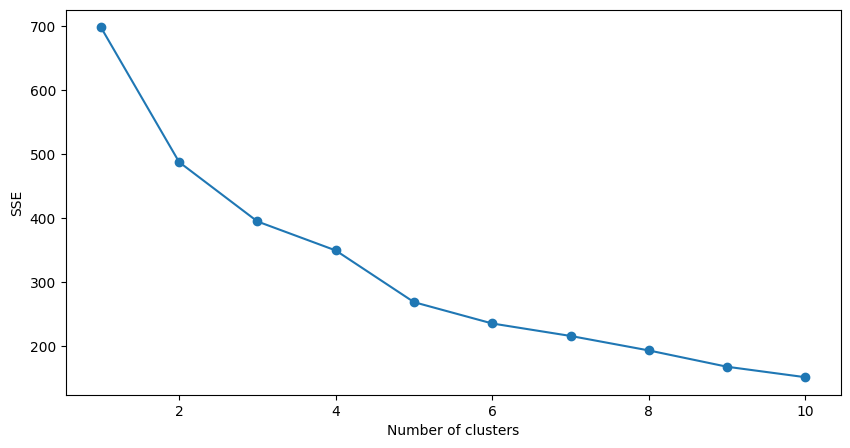

In [9]:
# Plot the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [10]:
# Fit K-Means with the optimal number of clusters
optimal_k = 4  # Example: if the Elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(transformed_features)

In [11]:
# Add cluster labels to the original data
data['Cluster'] = clusters

In [12]:
# Select numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number']).columns

In [13]:
# Analyze cluster characteristics using only numeric columns
cluster_profile = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_profile)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         73.828571  60.057143           49.800000               42.342857   
1        108.951220  28.292683           63.756098               73.463415   
2         55.543478  40.695652           41.434783               39.934783   
3        162.891892  39.891892           87.432432               18.837838   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  


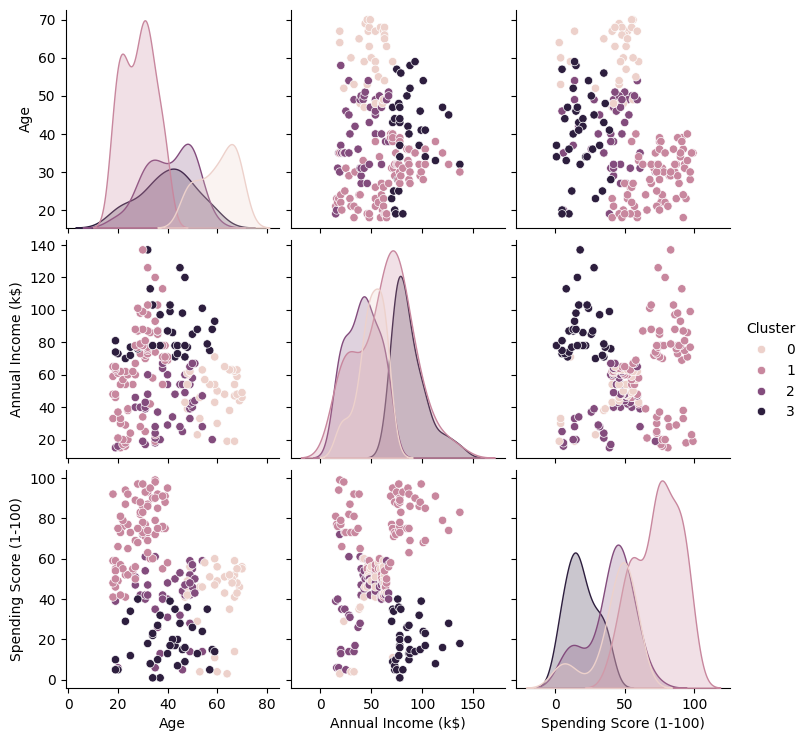

In [15]:
# Visualize the clusters
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()